In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Kate/Desktop/Docker/sqlite/horo1.csv')
df

,date,zodiac,horo,source
0,2023-08-06,Овен,"Намерения ваши прекрасны, но время для их осущ...",https://74.ru/horoscope/daily/
1,2023-08-06,Телец,Ваше сострадание и понимание бесконечны. Вы по...,https://74.ru/horoscope/daily/
2,2023-08-06,Близнецы,"Небольшое неудобство, которое вам придется пре...",https://74.ru/horoscope/daily/
3,2023-08-06,Рак,Привычные глазу лица и предметы вряд ли смогут...,https://74.ru/horoscope/daily/
4,2023-08-06,Лев,Сегодня вы будете равным среди великих. У вас ...,https://74.ru/horoscope/daily/
...,...,...,...,...
256200,2023-08-30,Скорпион,Сегодня Скорпионов ждёт приятная встреча. Ныне...,https://astroscope.ru/horoskop/ejednevniy_goro...
256201,2023-08-30,Стрелец,"Дорогие Стрельцы, гороскоп на сегодня обещает ...",https://astroscope.ru/horoskop/ejednevniy_goro...
256202,2023-08-30,Козерог,"Постарайтесь сегодня, дорогие Козероги, быть в...",https://astroscope.ru/horoskop/ejednevniy_goro...
256203,2023-08-30,Водолей,День для Водолеев характеризуется неожиданными...,https://astroscope.ru/horoskop/ejednevniy_goro...


In [3]:
df['zodiac'].value_counts()

Водолей                     22523
Весы                        22431
Дева                        22221
Рыбы                        21957
Близнецы                    21939
Козерог                     21806
Телец                       21574
Стрелец                     21562
Скорпион                    21556
Рак                         21535
Овен                        20775
Лев                         16278
Гороскоп на сегодня            24
Для всех знаков зодиака.       23
Name: zodiac, dtype: int64

In [4]:
df = df[df['zodiac'] != 'Гороскоп на сегодня']
df = df[df['zodiac'] != 'Для всех знаков зодиака.']

In [5]:
df['horo'] = df['horo'].apply(lambda x: str(x).split('\xa0')[0])

In [6]:
import re
df['horo'] = df['horo'].apply(lambda x: x.replace('\n', ''))
df['horo'] = df['horo'].apply(lambda x: x.replace('\xa0', ''))
df['horo'] = df['horo'].apply(lambda x: re.sub(re.compile('[^а-яА-ЯЁё !.,:?;«»]'), '', x ))

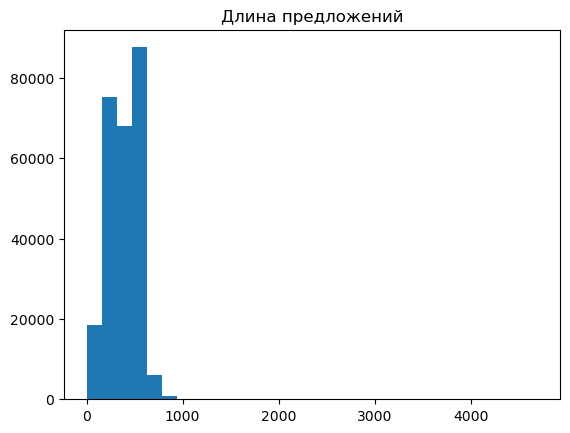

In [7]:
import matplotlib.pyplot as plt
plt.title('Длина предложений')
plt.hist(list(map(len, df['horo'])), bins=30)
plt.show()

In [8]:
df['len'] = df['horo'].apply(lambda x: len(x))

In [9]:
df = df[df['len'] > 300]

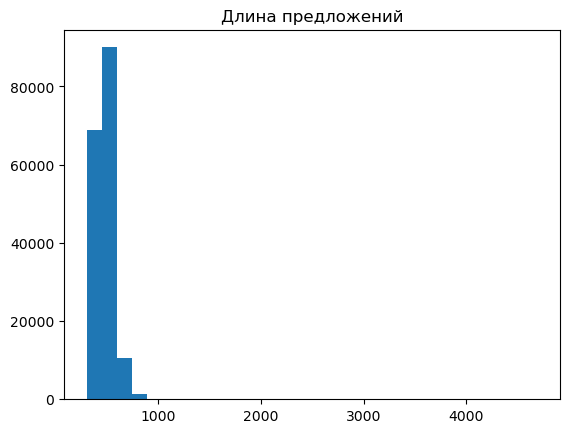

In [10]:
plt.title('Длина предложений')
plt.hist(list(map(len, df['horo'])), bins=30)
plt.show()

In [11]:
df = df[df['len'] < 500]

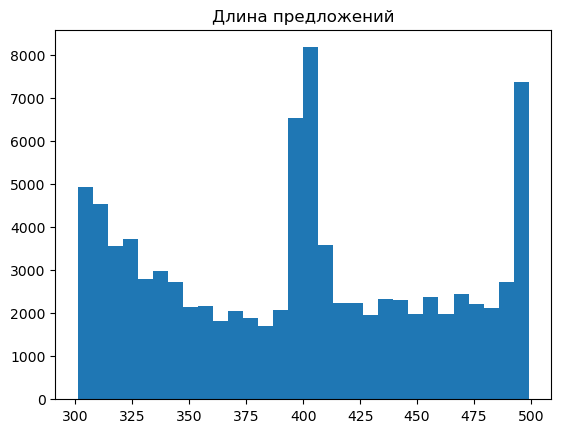

In [12]:
plt.title('Длина предложений')
plt.hist(list(map(len, df['horo'])), bins=30)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91740 entries, 50 to 256204
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    91740 non-null  object
 1   zodiac  91740 non-null  object
 2   horo    91740 non-null  object
 3   source  91740 non-null  object
 4   len     91740 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
df = df.drop_duplicates(subset='horo', keep = 'first', inplace = False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88741 entries, 50 to 256204
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    88741 non-null  object
 1   zodiac  88741 non-null  object
 2   horo    88741 non-null  object
 3   source  88741 non-null  object
 4   len     88741 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.1+ MB


In [16]:
df['zodiac'].value_counts()

Рыбы        7714
Близнецы    7705
Козерог     7689
Скорпион    7671
Телец       7618
Рак         7591
Стрелец     7591
Водолей     7577
Весы        7546
Дева        7538
Овен        7272
Лев         5229
Name: zodiac, dtype: int64

In [17]:
df.to_csv('fin_horo.csv', sep = '#')